In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [3]:
len(data_df)

70000

In [4]:
display(data_df['ap_hi'].unique())
display(data_df['ap_lo'].unique())

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

From the above unique 'ap_hi' values it is observed that there abnormal values. 
Logically, the values should not have negative and the permitted values such as 220 for ap_hi and 100 for ap_lo. 
Thus, it is a need to filter them out from the dataset.

In [5]:
#Given that the highest reading 220 and low reading is below 100, we are seeing some abnormal numbers.
data_df_reduced = data_df[(data_df['ap_hi'] > 0) & (data_df['ap_hi'] <= 220) & 
                          (data_df['ap_lo'] > 0) & (data_df['ap_lo'] <=100 )]
len(data_df_reduced)

68198

In [6]:
data_df = data_df_reduced

Correcting the data type

In [7]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")

In [8]:
#Function to show column unique values
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")


In [9]:
#Convert age into years into a new 'age_years' column and then drop the initial age column.
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)

Introduce a new parameter 'bmi' stands for Body Mass Index. This might help in give a better gauge on the dataset.

Formula:
BMI = weight(kg) / (height) * (height)(cm)

In [10]:
#Introduced a new column as bmi stands for Body Mass Index. 
data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [11]:
#TO CHECK age_years for <20 and >60
#data_df['age_years'].describe()


In [12]:
data_df

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age_years,bmi
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,168,Architect,0,62.0,0,50,21.967120
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,156,Accountant,0,85.0,1,55,34.927679
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,165,Chef,0,64.0,1,51,23.507805
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,169,Lawyer,0,82.0,1,48,28.710479
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,156,Architect,0,56.0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,Singapore,99993,1,0,120,80,1,2,1,168,Doctor,1,76.0,0,52,26.927438
69996,2022-01-12,Malaysia,99995,1,0,140,90,2,1,2,158,Accountant,0,126.0,1,61,50.472681
69997,2022-08-25,Malaysia,99996,0,1,180,90,3,2,1,183,Accountant,0,105.0,1,52,31.353579
69998,2020-07-13,Singapore,99998,0,0,135,80,1,1,2,163,Accountant,0,72.0,1,61,27.099251


For better than understanding on the blood pulse measurement. I try to categorize them accordingly to American Heart Association standards.

Reference to:
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings


In [13]:
#define bplevels
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])
        try:
            if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
                df.loc[x, 'bp_normal'] = 1
            elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
                df.loc[x, 'bp_elevated'] = 1
            elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
                df.loc[x, 'bp_hypertension1'] = 1
            else:
                df.loc[x, 'bp_hypertension2'] = 1
        except:
            pass
    
    return df
   

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)




In [14]:
#Save copy for later profiling analysis
data_df.to_csv('./source/Dataset/analysis_copy.csv', index=False)

In [15]:
#To confirm that each column is filled.
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

Unique values for column 'bp_normal': [0 1]
Unique values for column 'bp_elevated': [0 1]
Unique values for column 'bp_hypertension1': [1 0]
Unique values for column 'bp_hypertension2': [0 1]


In [16]:
#Drop the initial ap_hi and ap_lo
data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)

Next, i try to categorize the population into different age group from 'age_years' column.

Age Groups:
20s - 19 to 29, 
30s - 30 to 39, 
40s - 40 to 49, 
50s - 50 to 59, 
60s - above 60

In [17]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [18]:
#To ensure columns are created
data_df.columns

Index(['date', 'country', 'id', 'active', 'alco', 'cholesterol', 'gender',
       'gluc', 'height', 'occupation', 'smoke', 'weight', 'disease', 'bmi',
       'bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2',
       'age_binned_20s', 'age_binned_30s', 'age_binned_40s', 'age_binned_50s',
       'age_binned_60s'],
      dtype='object')

In [19]:
#Also to find out the different age group disease counts
agebins_columns = data_df.filter(regex=r'^age_')

for col in agebins_columns:
    print(col)
    print(data_df[data_df[col] == 1].disease.value_counts())


age_binned_20s
disease
0    3
Name: count, dtype: int64
age_binned_30s
disease
0    1341
1     408
Name: count, dtype: int64
age_binned_40s
disease
0    12086
1     7117
Name: count, dtype: int64
age_binned_50s
disease
1    17531
0    17024
Name: count, dtype: int64
age_binned_60s
disease
1    8444
0    4244
Name: count, dtype: int64


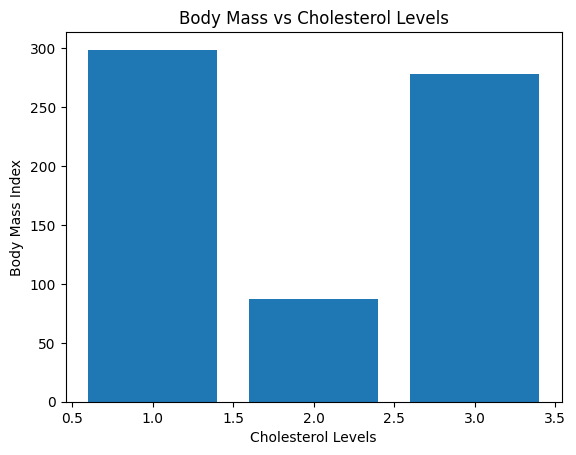

In [20]:
cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

ANALYSIS: Based on the chart, we can know that the higher the 'Cholesterol Levels'. However, for some cases where person with has high Body Mass Index can also has low Cholesterol reading. Thus, it is acceptable. 

Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

EXPLAINATIONS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

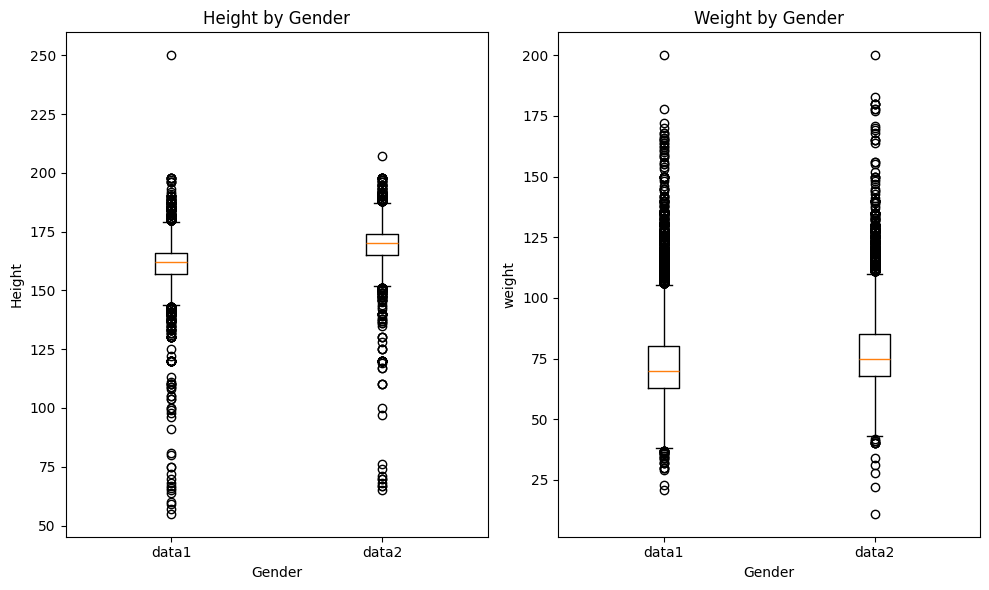

In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.
Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 2=M). 

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model but it is not the focus at this point.

In [22]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


In [23]:

def doExcludeOutliers(column_name):

    #Try to workout with the outliers
    q1 = data_df[column_name].quantile(0.25)
    q3 = data_df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for acceptable values
    threshold_lower = q1 - 1.5 * iqr
    threshold_upper = q3 + 1.5 * iqr

    # Identify outliers in the 'height' column
    outliers = data_df[(data_df[column_name] < threshold_lower) | (data_df[column_name] > threshold_upper)]

    # Exclude outliers from the dataset, but keep those within the threshold range
    filtered_data1 = data_df[(data_df[column_name] >= threshold_lower) & (data_df[column_name] <= threshold_upper)]

    plt.boxplot(filtered_data1[column_name], labels=[f'{column_name}_test'])
    plt.show()

    data_df = filtered_data1


In [24]:
#Optional features to exlude the outliers
#doExcludeOutliers('weight')
#doExcludeOutliers('height')

In [25]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



In [26]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


In [27]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

In [28]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


Text(0.5, 1.0, 'Correlation Heatmap')

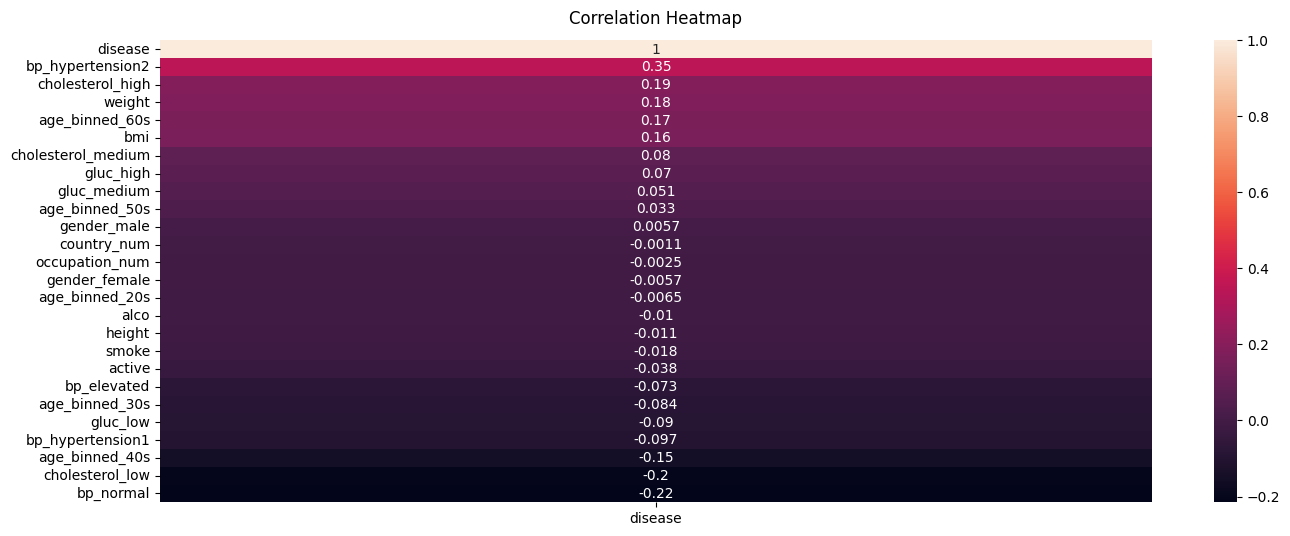

In [29]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
def doLogisticRegression(df, age_group_param):
    
    print("***********************************************")
    print("LOGISTIC REGRESSION")
    print("***********************************************")
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    lr = LogisticRegression(C=0.5, fit_intercept=True, solver='liblinear', max_iter=50000)

    lr.fit(X_train, y_train)

    pred = lr.predict(X_test)

    print(f"Training Score for {age_group_param}: ", lr.score(X_train, y_train))
    print(f"Test Score for {age_group_param}: ", lr.score(X_test, y_test))


    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df = report_df.transpose()
    report_df['age_group'] = age_group_param
    
    accuracy = metrics.accuracy_score(pred, y_test)

    return report_df


In [40]:
def doKNNClassifier(df, age_group_param):

    print("***********************************************")
    print("KNN CLASSIFIER")
    print("***********************************************")
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    knn = KNeighborsClassifier(n_neighbors = 5)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    print(f"Training Score for {age_group_param}: ", knn.score(X_train, y_train))
    print(f"Test Score for {age_group_param}: ", knn.score(X_test, y_test))

    acc = metrics.accuracy_score(pred, y_test)

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df = report_df.transpose()
    report_df['age_group'] = age_group_param
    

    return report_df 

In [41]:
def doDecisionTree(df, age_group_param):

    print("***********************************************")
    print("DECISION TREE")
    print("***********************************************")

    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Create a Decision Tree Classifier
    clf = DecisionTreeClassifier()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    pred = clf.predict(X_test)
    print(f"Training Score for {age_group_param}: ", clf.score(X_train, y_train))
    print(f"Test Score for {age_group_param}: ", clf.score(X_test, y_test))

    # Calculate the accuracy of the model
    acc = metrics.accuracy_score(y_test, pred)
    #print("The accuracy of the DecisionTree model is: ", acc*100, "%")

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df = report_df.transpose()
    report_df['age_group'] = age_group_param

    return report_df


In [42]:
# Feature Selection
selected_df = iddate_removed_df

selected_columns = selected_df.filter(regex=r'^age_')
selected_columns.drop('age_binned_20s', axis=True, inplace=True)

lr_merge_df = pd.DataFrame()
knn_merge_df = pd.DataFrame()
clf_merge_df = pd.DataFrame()

for col in selected_columns.columns:
    #print(col)
    df = selected_df[iddate_removed_df[col] == 1]
    #selected_df = iddate_removed_df.loc[(iddate_removed_df['age_binned_30s']==1) & (iddate_removed_df['disease'] == 1)]

    age_group = col[-3:]
    #result_df = doLogisticRegression(df, age_group)
    #print(result_df)
    lr_merge_df = pd.concat([lr_merge_df, doLogisticRegression(df, age_group)], axis=0)
    knn_merge_df = pd.concat([knn_merge_df, doKNNClassifier(df, age_group)], axis=0)
    clf_merge_df = pd.concat([clf_merge_df, doDecisionTree(df, age_group)], axis=0)


/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_38020/3946015602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.drop('age_binned_20s', axis=True, inplace=True)


***********************************************
LOGISTIC REGRESSION
***********************************************
Training Score for 30s:  0.8363116511794139
Test Score for 30s:  0.84
***********************************************
KNN CLASSIFIER
***********************************************


Training Score for 30s:  0.8034310221586848
Test Score for 30s:  0.7514285714285714
***********************************************
DECISION TREE
***********************************************
Training Score for 30s:  0.9992852037169406
Test Score for 30s:  0.6942857142857143
***********************************************
LOGISTIC REGRESSION
***********************************************
Training Score for 40s:  0.7564119255305298
Test Score for 40s:  0.7500650872168706
***********************************************
KNN CLASSIFIER
***********************************************
Training Score for 40s:  0.7571279781278479
Test Score for 40s:  0.6368133298620151
***********************************************
DECISION TREE
***********************************************
Training Score for 40s:  0.9918630386668402
Test Score for 40s:  0.6396771674043218
***********************************************
LOGISTIC REGRESSION
***********************************************
Training Score fo

In [43]:
lr_merge_df

,precision,recall,f1-score,support,age_group
0,0.839744,0.977612,0.903448,268.000000,30s
1,0.842105,0.390244,0.533333,82.000000,30s
accuracy,0.840000,0.840000,0.840000,0.840000,30s
macro avg,0.840924,0.683928,0.718391,350.000000,30s
weighted avg,0.840297,0.840000,0.816736,350.000000,30s
0,0.737374,0.936285,0.825009,2417.000000,40s
1,0.800518,0.433989,0.562842,1424.000000,40s
accuracy,0.750065,0.750065,0.750065,0.750065,40s
macro avg,0.768946,0.685137,0.693925,3841.000000,40s
weighted avg,0.760784,0.750065,0.727814,3841.000000,40s


In [44]:
knn_merge_df

,precision,recall,f1-score,support,age_group
0,0.789137,0.921642,0.850258,268.000000,30s
1,0.432432,0.195122,0.268908,82.000000,30s
accuracy,0.751429,0.751429,0.751429,0.751429,30s
macro avg,0.610785,0.558382,0.559583,350.000000,30s
weighted avg,0.705567,0.751429,0.714056,350.000000,30s
0,0.674522,0.817129,0.739008,2417.000000,40s
1,0.515882,0.330758,0.403081,1424.000000,40s
accuracy,0.636813,0.636813,0.636813,0.636813,40s
macro avg,0.595202,0.573944,0.571045,3841.000000,40s
weighted avg,0.615708,0.636813,0.614468,3841.000000,40s


In [45]:
clf_merge_df

,precision,recall,f1-score,support,age_group
0,0.825911,0.761194,0.792233,268.000000,30s
1,0.378641,0.475610,0.421622,82.000000,30s
accuracy,0.694286,0.694286,0.694286,0.694286,30s
macro avg,0.602276,0.618402,0.606927,350.000000,30s
weighted avg,0.721122,0.694286,0.705404,350.000000,30s
0,0.712464,0.716591,0.714521,2417.000000,40s
1,0.514184,0.509129,0.511644,1424.000000,40s
accuracy,0.639677,0.639677,0.639677,0.639677,40s
macro avg,0.613324,0.612860,0.613083,3841.000000,40s
weighted avg,0.638954,0.639677,0.639307,3841.000000,40s


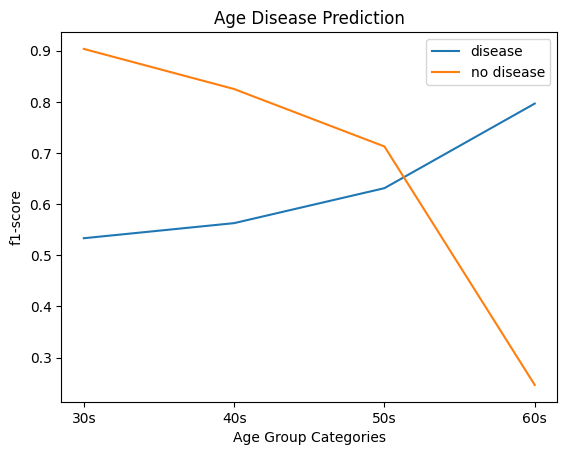

In [46]:
x_axis = lr_merge_df['age_group'].drop_duplicates().values

markers_nodisease = lr_merge_df['f1-score']['0']
markers_withdisease = lr_merge_df['f1-score']['1']

plt.plot(x_axis, markers_withdisease, label='disease')
plt.plot(x_axis, markers_nodisease, label='no disease')

plt.xlabel("Age Group Categories")
plt.ylabel("f1-score")
plt.legend()
plt.title('Age Disease Prediction')
plt.show()


